In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading time analysis

In [2]:
voo01 = pd.read_csv('./voo-01.csv')
voo02 = pd.read_csv('./voo-02.csv')
voo03 = pd.read_csv('./voo-03.csv')

In [3]:
def time_analysis(df):
    df['time_diff'] = df['Time'].diff()

    number_of_readings = len(df['time_diff'])
    total_time = df["Time"].iloc[-1] - df["Time"].iloc[0]
    max_diff = df['time_diff'].max()
    min_diff = df['time_diff'].min()
    mean_diff = df['time_diff'].mean()

    print("-=-=- General Statistics -=-=-")
    print(f"Max: {max_diff} ms")
    print(f"Min: {min_diff} ms")
    print(f"Amplitude: {(max_diff - min_diff):.2f} ms")
    print(f"Mean: {(mean_diff):.2f} ms")
    print(f"Total time: {(total_time/1000):.2f} s")
    print(f"Average readings per second: {(number_of_readings / total_time*1000):.2f}")

    # Histogram of time between each reading
    plt.plot(df['time_diff'])
    plt.title('Time between readings')
    plt.xlabel('Reading number')
    plt.ylabel('Time difference (ms)')
    plt.show()

-=-=- General Statistics -=-=-
Max: 82.0 ms
Min: 34.0 ms
Amplitude: 48.00 ms
Mean: 39.15 ms
Total time: 143.89 s
Average readings per second: 25.55


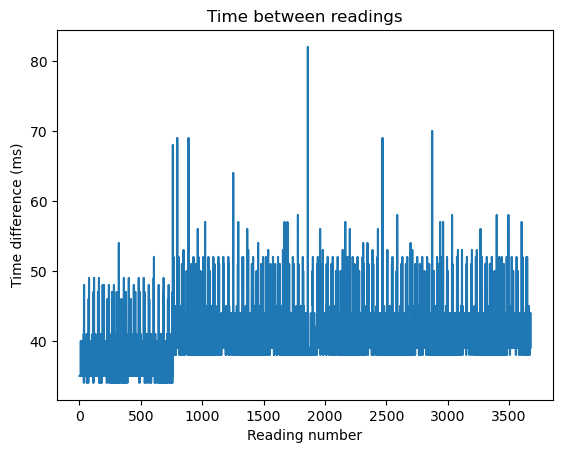

-=-=- General Statistics -=-=-
Max: 1035.0 ms
Min: 34.0 ms
Amplitude: 1001.00 ms
Mean: 39.05 ms
Total time: 91.10 s
Average readings per second: 25.62


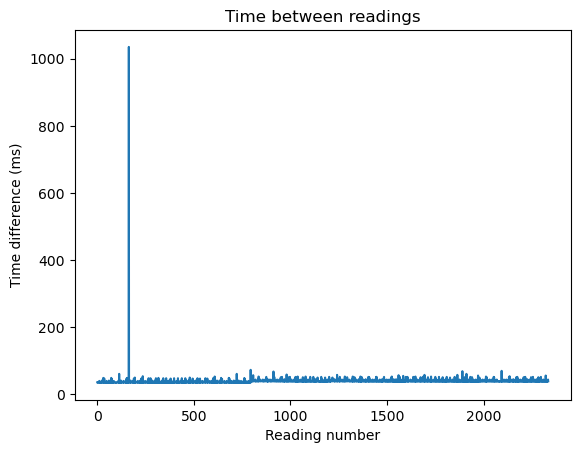

-=-=- General Statistics -=-=-
Max: 95.0 ms
Min: 34.0 ms
Amplitude: 61.00 ms
Mean: 38.32 ms
Total time: 73.04 s
Average readings per second: 26.11


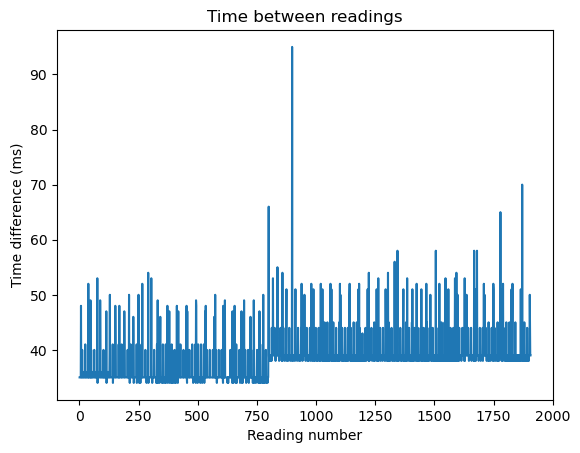

In [4]:
time_analysis(voo01)
time_analysis(voo02)
time_analysis(voo03)

# Relative timing

In [5]:
def relative_time(df):
    first_time = df["Time"].iloc[0]
    df["Time"] = df["Time"] - first_time

In [6]:
relative_time(voo01)
relative_time(voo02)
relative_time(voo03)

# Sensor calibration

In [7]:
def sensor_calibration(df):
    # Using voo01 as reference
    # Until 37s the aero is still

    voo01_AcelX_mean = (voo01['Acel. X'].iloc[0:370]).mean()
    voo01_AcelY_mean = (voo01['Acel. Y'].iloc[0:370]).mean()
    voo01_AcelZ_mean = (voo01['Acel. Z'].iloc[0:370]).mean()

    df['Acel. X'] = df['Acel. X'] - voo01_AcelX_mean
    df['Acel. Y'] = df['Acel. Y'] - voo01_AcelY_mean
    df['Acel. Z'] = (df['Acel. Z'] - voo01_AcelZ_mean) + 9.807

    voo01_RotX_mean = (voo01['Rot. X'].iloc[0:370]).mean()
    voo01_RotY_mean = (voo01['Rot. Y'].iloc[0:370]).mean()
    voo01_RotZ_mean = (voo01['Rot. Z'].iloc[0:370]).mean()

    df['Rot. X'] = df['Rot. X'] - voo01_RotX_mean
    df['Rot. Y'] = df['Rot. Y'] - voo01_RotY_mean
    df['Rot. Z'] = df['Rot. Z'] - voo01_RotZ_mean


In [8]:
sensor_calibration(voo01)
sensor_calibration(voo02)
sensor_calibration(voo03)

In [9]:
def plot_sensors(df):
    plt.plot(df['Time'] / 1000, df['Acel. X'], label='Acel. X')
    plt.plot(df['Time'] / 1000, df['Acel. Y'], label='Acel. Y')
    plt.plot(df['Time'] / 1000, df['Acel. Z'], label='Acel. Z')
    plt.title('Acceleration')  
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.legend()
    plt.show()

    plt.plot(df['Time'] / 1000, df['Rot. X'], label='Rot. X')
    plt.plot(df['Time'] / 1000, df['Rot. Y'], label='Rot. Y')
    plt.plot(df['Time'] / 1000, df['Rot. Z'], label='Rot. Z')
    plt.title('Rotation')
    plt.xlabel('Time (ms)')
    plt.ylabel('Rotation (rad/s)')
    plt.legend()
    plt.show()

-=-=- VOO 01 -=-=-


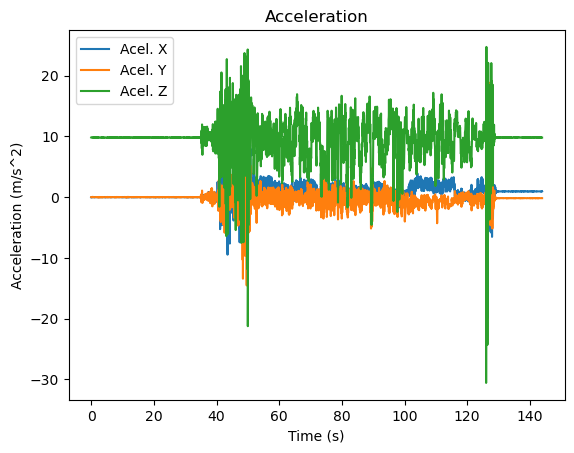

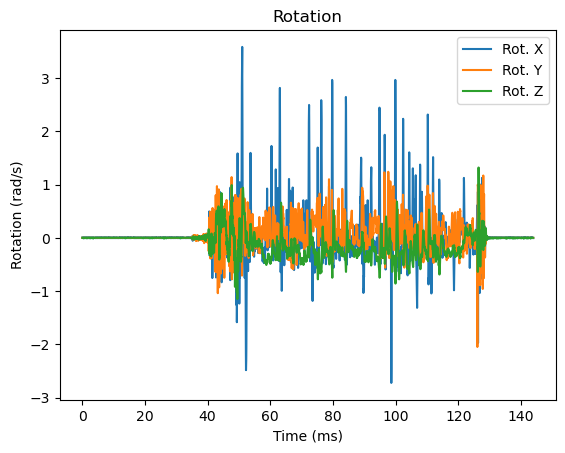

-=-=- VOO 02 -=-=-


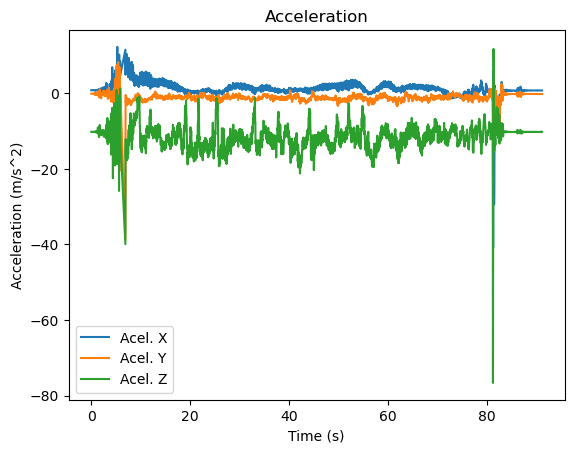

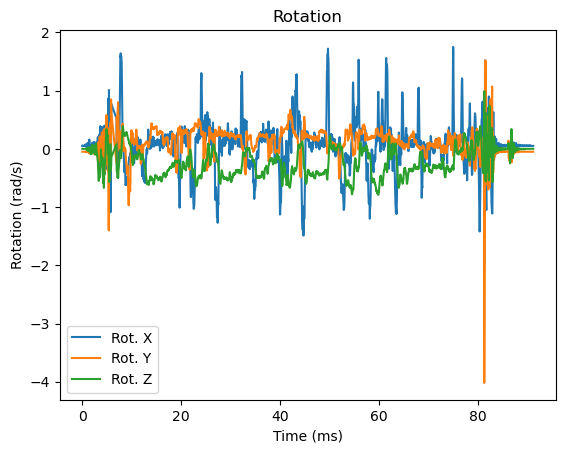

-=-=- VOO 03 -=-=-


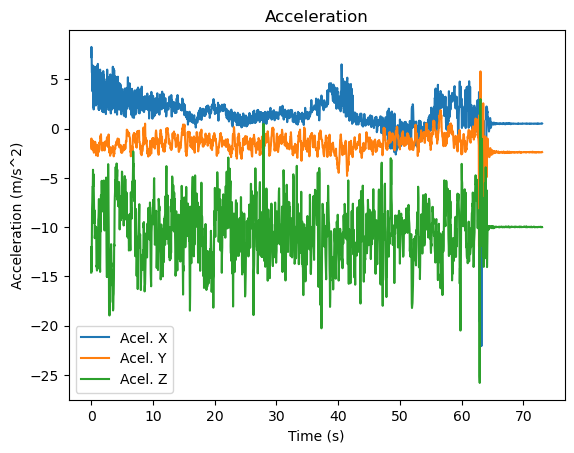

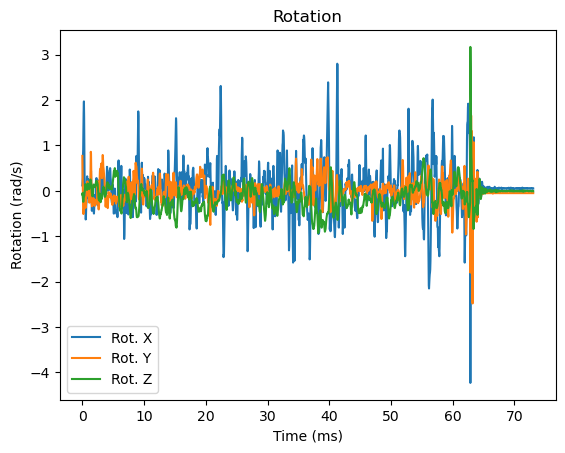

In [10]:
print("-=-=- VOO 01 -=-=-")
plot_sensors(voo01)

print("-=-=- VOO 02 -=-=-")
plot_sensors(voo02)

print("-=-=- VOO 03 -=-=-")
plot_sensors(voo03)

**Rotations reference:**
- Axis X: Roll
- Axis Y: Pitch
- Axis Z: Yaw

# Export data

In [11]:
voo01.to_csv('voo-01-processed.csv', index=False)
voo02.to_csv('voo-02-processed.csv', index=False)
voo03.to_csv('voo-03-processed.csv', index=False)